### Employee Promotion Evaluation using SVM

#### Attribute description
employee_id -	Unique ID for employee <br/>
department - Department of employee <br/>
region	- Region of employment (unordered)<br/>
education -	Education Level<br/>
gender	- Gender of Employee<br/>
recruitment_channel	- Channel of recruitment for employee<br/>
no_of_trainings - no of other trainings completed in previous year on soft skills, technical skills etc.<br/>
age	- Age of Employee<br/>
previous_year_rating -	Employee Rating for the previous year<br/>
length_of_service -	Length of service in years<br/>
KPIs_met >80%	- if Percent of KPIs(Key performance Indicators) >80% then 1 else 0<br/>
awards_won?	- if awards won during previous year then 1 else 0<br/>
avg_training_score -	Average score in current training evaluations<br/>
is_promoted	(Target) - Recommended for promotion<br/>


#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd();

In [2]:
emp_data = pd.read_csv('train_.csv')
emp_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
emp_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [4]:
emp_data.shape

(54808, 14)

### Checking for the null values in data 

In [5]:
emp_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ED2D97390>]],
      dtype=object)

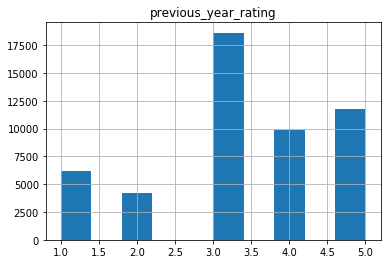

In [7]:
emp_data.hist(column='previous_year_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ED4E75550>,
      dtype=object)

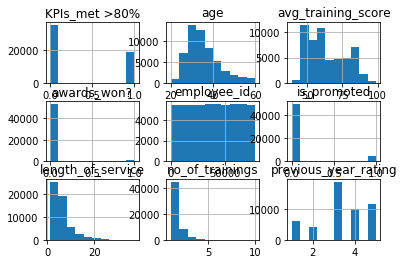

In [8]:
emp_data.hist()

In [9]:
emp_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


### Filling null values in categorical and numerical data

In [10]:
emp_data.previous_year_rating = emp_data.previous_year_rating.fillna(emp_data.previous_year_rating.mean())

emp_data.education.fillna("Bachelor's",inplace=True)

In [11]:
cat_columns= emp_data[['department', 'region', 'education', 'gender', 'recruitment_channel']]

In [12]:
cat_columns

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing


### label encoding for the categorical data

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in cat_columns.columns:
    cat_columns[column] = labelencoder.fit_transform(cat_columns[column])

C:\Users\CTS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
label_data = emp_data.drop(cat_columns,axis=1)

In [15]:
label_data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0
54804,74592,1,37,2.0,6,0,0,56,0
54805,13918,1,27,5.0,3,1,0,79,0
54806,13614,1,29,1.0,2,0,0,45,0


### Merging the categorical and labeled data to form train data

In [16]:
train_data = pd.concat([cat_columns, label_data], axis=1)

In [17]:
train_data.head()

,department,region,education,gender,recruitment_channel,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,65438,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,65141,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,7513,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2542,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,48945,1,45,3.0,2,0,0,73,0


### Checking for correlation

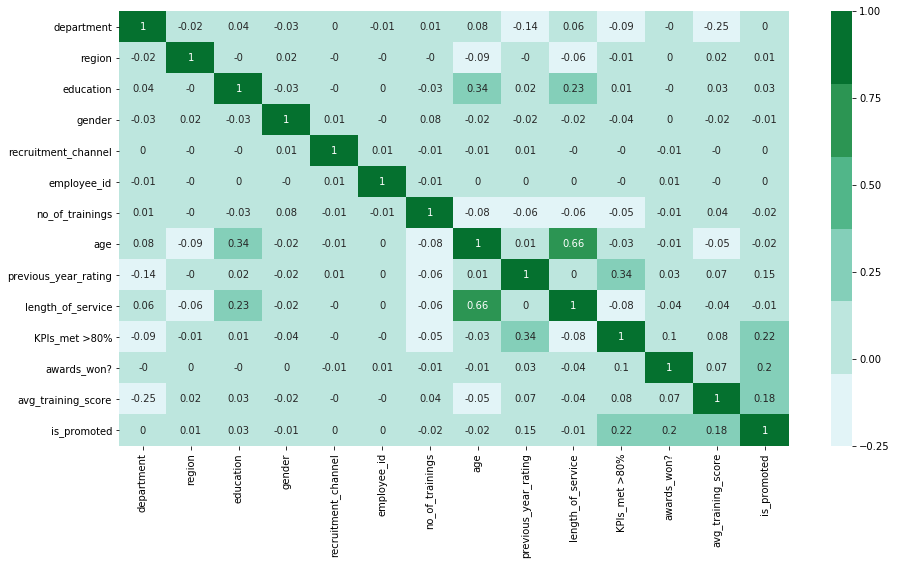

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
cor = round(train_data.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('BuGn'), annot = True)

### splittng data into train and test 

In [19]:
from sklearn.model_selection import train_test_split
features = train_data.drop('is_promoted', axis=1)
target = train_data['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=100)

### checking for class imbalance

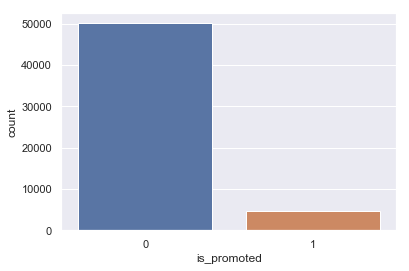

In [20]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="is_promoted", data= train_data)

### Using SMOTE to balance the data

In [21]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_train_target = oversampler.fit_sample(X_train,y_train)
smote_test,smote_test_target =oversampler.fit_sample(X_test,y_test)

### Fitting the SVM model on train data

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer



In [ ]:
svc=SVC(kernel='linear')
svc_fit = svc.fit(smote_train,smote_train_target)
y_predict_train = svc_fit.predict(smote_train)
y_predict_test=svc_fit.predict(smote_test)

### Classification report

In [ ]:
print("Classification report for test data:\n", classification_report(smote_test_target, y_predict_test))


### Confusion matrix

In [ ]:
print("CONFUSION MATRIX \n",confusion_matrix(smote_test_target,y_predict_test))

### Accuracy 

In [ ]:
print("Train Accuracy Score:", accuracy_score(smote_train_target, y_predict_train))
print("Test Accuracy Score:", accuracy_score(smote_test_target, y_predict_test))